In [1]:
# 读取数据
import pandas as pd
import numpy as np
# 读取小批量数据
ai_prediction_test = pd.read_csv("./data/ai_prediction.csv")
policy_prediction_test = pd.read_csv("./data/policy_prediction.csv")
n_ai = len(ai_prediction_test)
n_policy = len(policy_prediction_test)
print(ai_prediction_test)
print(policy_prediction_test)

                                                review  gpt-judge  gpt-label  \
0    回复 @NaHSO3 :很可惜画作内的情感也是靠人去诠释的，而不是画作本身就能散打情感，所以...          0          1   
1                          回复 @她若星辰璀璨 :艺术无用，所以无所谓代不代替。          0          0   
2                                 感觉就是 AI 辅助美术 达到更好的美术          1          1   
3                                 在资本主义中，人和工具的对立永远不会结束          0          0   
4                                                三连求分享          1          1   
..                                                 ...        ...        ...   
995                                               大使馆。          0          1   
996                                              不愧是李白          0          1   
997                                                发你咯          0          1   
998                                             [doge]          0          1   
999                       猴子们在火葬场购买机械键盘x\r\n跳车党在矿场购买显卡          0          1   

     label_0-pred  label_1-pred  pred-l

In [2]:
# 计算有效率
def gpt_judge_to_int(x):
    if isinstance(x, int):
        return x
    else:
        if x.count("0") >= x.count("1"):
            return 0
        else:
            return 1

def effective_rate(n, X):
    return np.sum([gpt_judge_to_int(x) for x in X]) / n
ai_effective_rate = effective_rate(n_ai, ai_prediction_test["gpt-judge"])
policy_effective_rate = effective_rate(n_policy, policy_prediction_test["gpt-judge"])
# print(ai_prediction_data["gpt-judge"])
# print(policy_prediction_data["gpt-judge"])
print("ai的有效率为：{}".format(ai_effective_rate))
print("policy的有效率为：{}".format(policy_effective_rate))


ai的有效率为：0.387
policy的有效率为：0.33934426229508197


In [3]:
print(max(ai_prediction_test["pred-label"]), max(ai_prediction_test["likes"]))
print(max(policy_prediction_test["pred-label"]), max(policy_prediction_test["likes"]))

1 5603
5 8352


In [4]:
ai_prediction_data = pd.read_csv("./data/ai_prediction_all.csv")
policy_prediction_data = pd.read_csv("./data/policy_prediction_all.csv")
print(ai_prediction_data)
print(policy_prediction_data)

                                                  review  gpt-judge  \
0      回复 @NaHSO3 :很可惜画作内的情感也是靠人去诠释的，而不是画作本身就能散打情感，所以...          0   
1                            回复 @她若星辰璀璨 :艺术无用，所以无所谓代不代替。          0   
2                                   感觉就是 AI 辅助美术 达到更好的美术          0   
3                                   在资本主义中，人和工具的对立永远不会结束          0   
4                                                  三连求分享          0   
...                                                  ...        ...   
10003                  还是谋杀定罪啊，正当防卫是有条件的，不然所有人都正当防卫了[吃瓜]          0   
10004                                             就像百度治病          0   
10005                                       我们没有智能，但是有人工          0   
10006  我是微软员工 说实话一开始内部听说这东西的时候只感觉是噱头而已 刺激下市场涨涨股价完事 直到...          0   
10007                                           三连求书，谢谢啦          0   

       gpt-label  label_0-pred  label_1-pred  pred-label                 time  \
0              1      1.261572      0.027117           0  2022-09-

In [5]:
print(max(ai_prediction_data["pred-label"]), max(ai_prediction_data["likes"]))
print(max(policy_prediction_data["pred-label"]), max(policy_prediction_data["likes"]))

1 13292
5 37552


In [6]:
# 清洗数据
# 首先列出标签大于1的数据
count = 0
for i, x in enumerate(policy_prediction_data["pred-label"]):
    if x > 1:
        print(policy_prediction_data["review"][i], x)
        count += 1
print(count)

回复 @Kumori_Official :中医怎么了？还黑中医？日本人都快把中药当宝供上了我们为什么要轻视中医？ 2
[東雪蓮_流汗][東雪蓮_流汗][東雪蓮_流汗][東雪蓮_流汗] 5
海南大学今天发通告一个教师不做核酸被取消教师资格了 2
我和我的家乡[辣眼睛][辣眼睛] 4
学校三天三检完，市里连夜再加三天三检 2
【《历史研究》刊发特稿《明清时期“闭关锁国”问题新探》 敬请关注！-哔哩哔哩】 https://b23.tv/ofeNkYI 3
现在小朋友少见多怪 2
小心被开除乡籍 2
https://www.bilibili.com/video/BV1214y1W7ca?spm_id_from=333.337.search-card.all.click&vd_source=19cc5c02e8b2d5e3093d5f7d369b5f12 4
300+地级市 这一年目标200 [2022] 32/200 2
二伯：爸爸，你也不想你最心爱的孙子不能当公务员吧 2
承德出人才啊 2
来自督工的肯定 2
有啊，不就是V博啊，每个人都有小作文的权利，还是直接上答到天庭。
舆论的曝光比上访厉害的很，而且V博还喜欢这种增加自己准线上治国的感觉。 2
【石家庄疫情形势严峻！没有这两个证尽量别出来，小心被抓-哔哩哔哩】 https://b23.tv/pPGQUnn 2
我错在人生规划太简单，还没读研就上班 2
这可是老家啊[热词系列_知识增加] 5
这绝对是督工爱的话题 2
93年的也秃了[doge][doge] 4
深刻 4
体温加10°，水分-10 4
督工这期啊，让我想起在部队那时候，假期留校。每个宿舍必须要留一个人。大家就出钱，一轮200，依次出钱加码。直到哪个人说，我留下，那些钱就归他。留校的人拿钱，其他人回家。 2
小朋友少见多怪是好事，这一方面说明了我们社会确实在一点点进步，另一方面也表明新一代人有向不公反抗的意识和力量。 2
就差龙场悟道了[doge] 4
[热词系列_爱了爱了] 5
我们太需要督工这样的媒体人了。 2
老谭立夫辣[滑稽] 4
市和学校不通用？ 2
我恒大翡翠华庭的志愿者，今天工作差点遭恒大翡翠华庭6栋住户打了，又是骂爹又是骂妈，骂完还要打我哦，真的，我才16岁。为这些人服务干啥 2
自投罗网？已经几省联名通缉了[doge] 2
老观众觉得马督

In [7]:
# 在看看时间分布
count1, count2, count3, count4 = 0, 0, 0, 0
for i, x in enumerate(policy_prediction_data["pred-label"]):
    if x > 1:
        print(policy_prediction_data["time"][i], x)
        if policy_prediction_data["time"][i] <= "2022-10-15":
            count1 += 1
        elif policy_prediction_data["time"][i] <= "2022-12-01":
            count2 += 1
        elif policy_prediction_data["time"][i] <= "2023-01-15":
            count3 += 1
        else:
            count4 += 1
print(count1, count2, count3, count4)

2022-09-02 06:09:35 2
2022-09-02 11:10:02 5
2022-09-02 11:10:47 2
2022-09-02 11:10:49 4
2022-09-02 11:10:50 2
2022-09-02 11:11:08 3
2022-09-02 11:11:32 2
2022-09-02 11:11:41 2
2022-09-02 11:12:13 4
2022-09-02 11:12:57 2
2022-09-02 11:14:22 2
2022-09-02 11:25:58 2
2022-09-02 11:33:55 2
2022-09-02 11:39:52 2
2022-09-02 11:41:01 2
2022-09-02 11:53:26 2
2022-09-02 12:05:46 5
2022-09-02 12:10:53 2
2022-09-02 12:30:41 4
2022-09-02 12:37:09 4
2022-09-02 13:14:18 4
2022-09-02 14:04:49 2
2022-09-02 14:05:40 2
2022-09-02 14:53:05 4
2022-09-02 15:59:45 5
2022-09-02 16:29:36 2
2022-09-02 16:41:31 4
2022-09-02 17:28:35 2
2022-09-02 17:34:59 2
2022-09-02 17:47:48 2
2022-09-02 18:20:45 2
2022-09-02 19:35:43 2
2022-09-03 01:07:15 2
2022-09-03 01:09:04 2
2022-09-03 01:25:03 2
2022-09-03 01:25:47 2
2022-09-03 02:30:02 4
2022-09-03 02:47:12 2
2022-09-03 02:58:48 2
2022-09-03 02:59:20 2
2022-09-03 02:59:20 2
2022-09-03 02:59:20 2
2022-09-03 02:59:20 2
2022-09-03 02:59:20 2
2022-09-03 02:59:20 2
2022-09-03

In [8]:
# 全部变成1
for i, x in enumerate(policy_prediction_data["pred-label"]):
    if x > 1:
        x = 1

print(max(policy_prediction_data["pred-label"]), max(policy_prediction_data["likes"]))

5 37552


In [9]:
# 计算准确率
def accuracy(n, X, Y):
    return np.sum([int(x == y) for x, y in zip(X, Y)]) / n

ai_accuracy = accuracy(n_ai, ai_prediction_test["pred-label"], ai_prediction_test["gpt-label"])
policy_accuracy = accuracy(n_policy, policy_prediction_test["pred-label"], policy_prediction_test["gpt-label"])
print("ai的准确率为：{}".format(ai_accuracy))
print("policy的准确率为：{}".format(policy_accuracy))

ai的准确率为：0.283
policy的准确率为：0.30245901639344264


In [10]:
pred_acc = 0.9  # 数据判断的准确率

n_ai = len(ai_prediction_data)
n_policy = len(policy_prediction_data)
print(n_ai)
print(n_policy)

# 将数据转换为-1和1以便计算乘法
def transform(x):
    if x == 0:
        return -1
    else:
        return 1

ai_pred_labels = np.array([[transform(x), int(likes)] for x, likes in zip(ai_prediction_data["pred-label"], ai_prediction_data["likes"])])
# ai_likes = np.array([int(x) for x in ai_prediction_data["likes"]])
policy_pred_labels = np.array([[transform(x), int(likes)] for x, likes in zip(policy_prediction_data["pred-label"], policy_prediction_data["likes"])])
# policy_likes = np.array([int(x) for x in policy_prediction_data["likes"]])
print(ai_pred_labels)
print(policy_pred_labels)

10008
10034
[[ -1   3]
 [ -1   1]
 [  1 149]
 ...
 [ -1   0]
 [ -1  33]
 [  1   1]]
[[-1 13]
 [-1  9]
 [ 1 50]
 ...
 [ 1  1]
 [ 1  0]
 [ 1  1]]



由于数据量大，有效率低，直接分析难以得出结论，因此需要对每个数据都乘一个权重likes来得到结果。

In [11]:
# 将计算置信区间的过程封装成函数
from scipy.stats import t
from math import sqrt

# 加权求和
def weighted_sum(Y):
    Z = 0
    for _, y in enumerate(Y):
        Z += y[0] * y[1]
    return Z


# 数据预处理
def data_preprocess(data, m=150):
    # np.random.shuffle(data)
    X_split = np.array_split(data, m)
    # print(X_split)
    Z = [weighted_sum(Y) for Y in X_split]
    Z_bar = sum(Z) / m
    return Z, Z_bar

# 计算标准差
def std(n, X, X_bar):
    return np.sqrt(sum([(x - X_bar)**2 for x in X]) / (n - 1))

# 计算Z到X的转换
def Z_to_X(Z, m=150):
    return Z / m

# 计算置信区间
def cal_confidence_interval(data, data_name, m=150):
    Z, Z_bar = data_preprocess(data, m)
    Z_std = std(m, Z, Z_bar)
    alpha = 0.05
    u_left = (Z_bar - Z_std * t.cdf(1 - alpha / 2, m - 1))/ sqrt(m)
    u_right = (Z_bar + Z_std * t.cdf(1 - alpha / 2, m - 1))/ sqrt(m)
    X_left = Z_to_X(u_left, m)
    X_right = Z_to_X(u_right, m)
    print("在置信度水平为{}时，{}的置信区间为：[{},{}]".format(1 - alpha, data_name, X_left, X_right))
    return X_left, X_right

In [61]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=['SimHei']
plt.rcParams["axes.unicode_minus"]=False
# 画出各个时间段置信区间的正负柱状图
def plot_confidence_interval(X_left, X_right, data_name, X_len):
    """
    画出各个时间段置信区间的正负柱状图
    :param X_left: 置信区间左端点
    :param X_right: 置信区间右端点
    :param data_name: 数据名称
    :param X_len: 时间段的个数
    :return: none
    """
    y_max = 1.5 * np.max(X_right)
    y_min = 1.2 * np.min(X_left)
    x_data = ["{}".format(i) for i in range(1, X_len + 1)]
    plt.figure(figsize=(20, 10), dpi=100)
    ax = plt.gca()
    ax.spines["bottom"].set_position(('data', 0))
    plt.bar(x_data, np.array(X_right), lw=0.5, fc="r", width=0.3, label="u_right")
    plt.bar(x_data, np.array(X_left), lw=0.5, fc="b", width=0.3, label="u_left")

    # 画出置信区间的中间线
    plt.plot(x_data, np.array(X_right), color="black", lw=0.5)
    plt.plot(x_data, np.array(X_left), color="black", lw=0.5)
    plt.legend()


    # 标出置信区间的数值
    for i, j in zip(x_data, X_right):
        plt.text(i, j, "%.2f"%j, ha="center", va="bottom")
    for i2, j2 in zip(x_data, X_left):
        plt.text(i2, j2, "%.2f"%j2, ha="center", va="top")

    # print("y_max:{}, y_min:{}".format(y_max, y_min))
    plt.ylim(y_min, y_max)
    plt.xticks([])
    plt.title("{}的置信区间".format(data_name))
    plt.show()

在置信度水平为0.95时，ai的置信区间为：[-2.200130283336895,0.914616293082125]
在置信度水平为0.95时，policy的置信区间为：[-1.6318103430726296,3.2736144102547153]


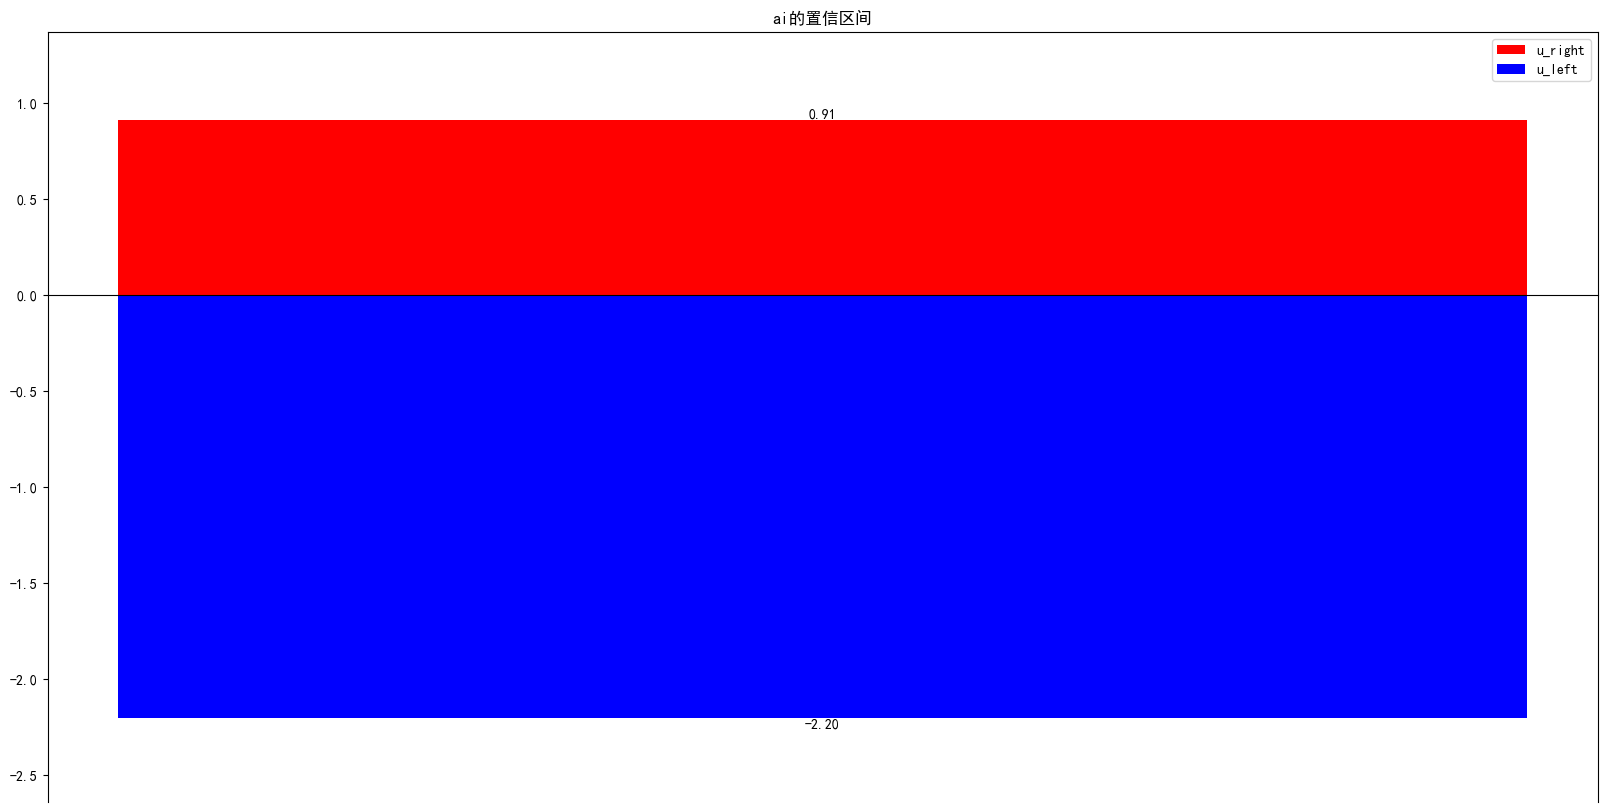

In [62]:
# 计算ai的置信区间
X_ai_left, X_ai_right = cal_confidence_interval(ai_pred_labels, "ai")
X_policy_left, X_policy_right = cal_confidence_interval(policy_pred_labels, "policy")
plot_confidence_interval([X_ai_left], [X_ai_right], "ai", 1)

In [56]:
# 选取数据的时间一列
ai_time = ai_prediction_data["time"]
policy_time = policy_prediction_data["time"]
m = 50
import math
constant_num = 500
X_ai_num = math.ceil(len(ai_pred_labels) / constant_num)
X_policy_num = math.ceil(len(policy_pred_labels) / constant_num)
X_ai = np.array_split(ai_pred_labels, X_ai_num)
X_policy = np.array_split(policy_pred_labels, X_policy_num)

for i in range(X_ai_num):
    # 输出shape
    # print("ai的第{}个时间段的shape为：{}".format(i + 1, np.array(X_ai[i]).shape))
    # 输出时间
    print("ai的第{}个时间段的时间的开始日期为：{}".format(i + 1, ai_time[i * constant_num]))
for i in range(X_policy_num):
    # 输出shape
    # print("policy的第{}个时间段的shape为：{}".format(i + 1, np.array(X_policy[i]).shape))
    # 输出时间
    print("policy的第{}个时间段的时间的开始日期为：{}".format(i + 1, policy_time[i * constant_num]))


ai的第1个时间段的时间的开始日期为：2022-09-01 02:07:15
ai的第2个时间段的时间的开始日期为：2022-09-15 10:40:06
ai的第3个时间段的时间的开始日期为：2022-09-28 15:28:15
ai的第4个时间段的时间的开始日期为：2022-10-11 05:36:22
ai的第5个时间段的时间的开始日期为：2022-10-24 18:18:18
ai的第6个时间段的时间的开始日期为：2022-11-04 04:01:04
ai的第7个时间段的时间的开始日期为：2022-11-15 13:34:47
ai的第8个时间段的时间的开始日期为：2022-11-28 10:17:50
ai的第9个时间段的时间的开始日期为：2022-12-05 15:03:12
ai的第10个时间段的时间的开始日期为：2022-12-15 16:52:13
ai的第11个时间段的时间的开始日期为：2022-12-24 16:18:58
ai的第12个时间段的时间的开始日期为：2023-01-10 16:25:02
ai的第13个时间段的时间的开始日期为：2023-01-30 01:25:05
ai的第14个时间段的时间的开始日期为：2023-02-06 15:52:42
ai的第15个时间段的时间的开始日期为：2023-02-10 17:46:22
ai的第16个时间段的时间的开始日期为：2023-02-13 08:12:00
ai的第17个时间段的时间的开始日期为：2023-02-15 17:40:32
ai的第18个时间段的时间的开始日期为：2023-02-19 04:33:27
ai的第19个时间段的时间的开始日期为：2023-02-20 16:05:29
ai的第20个时间段的时间的开始日期为：2023-02-23 07:55:46
ai的第21个时间段的时间的开始日期为：2023-02-28 17:16:00
policy的第1个时间段的时间的开始日期为：2022-09-01 01:11:59
policy的第2个时间段的时间的开始日期为：2022-09-26 12:42:23
policy的第3个时间段的时间的开始日期为：2022-10-23 18:50:29
policy的第4个时间段的时间的开始日期为：2022-11-07 18:06:

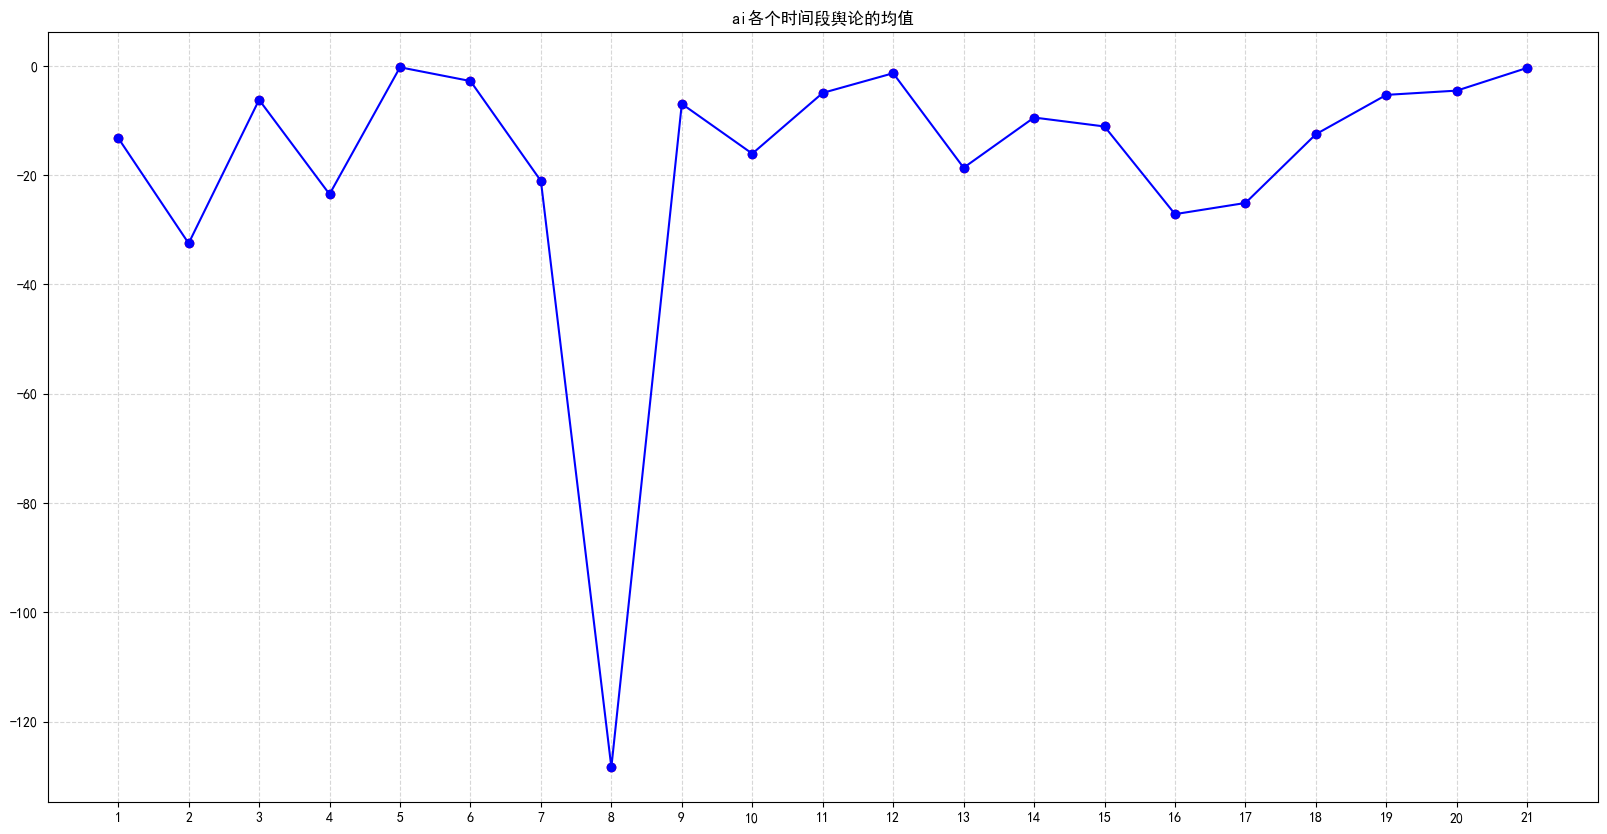

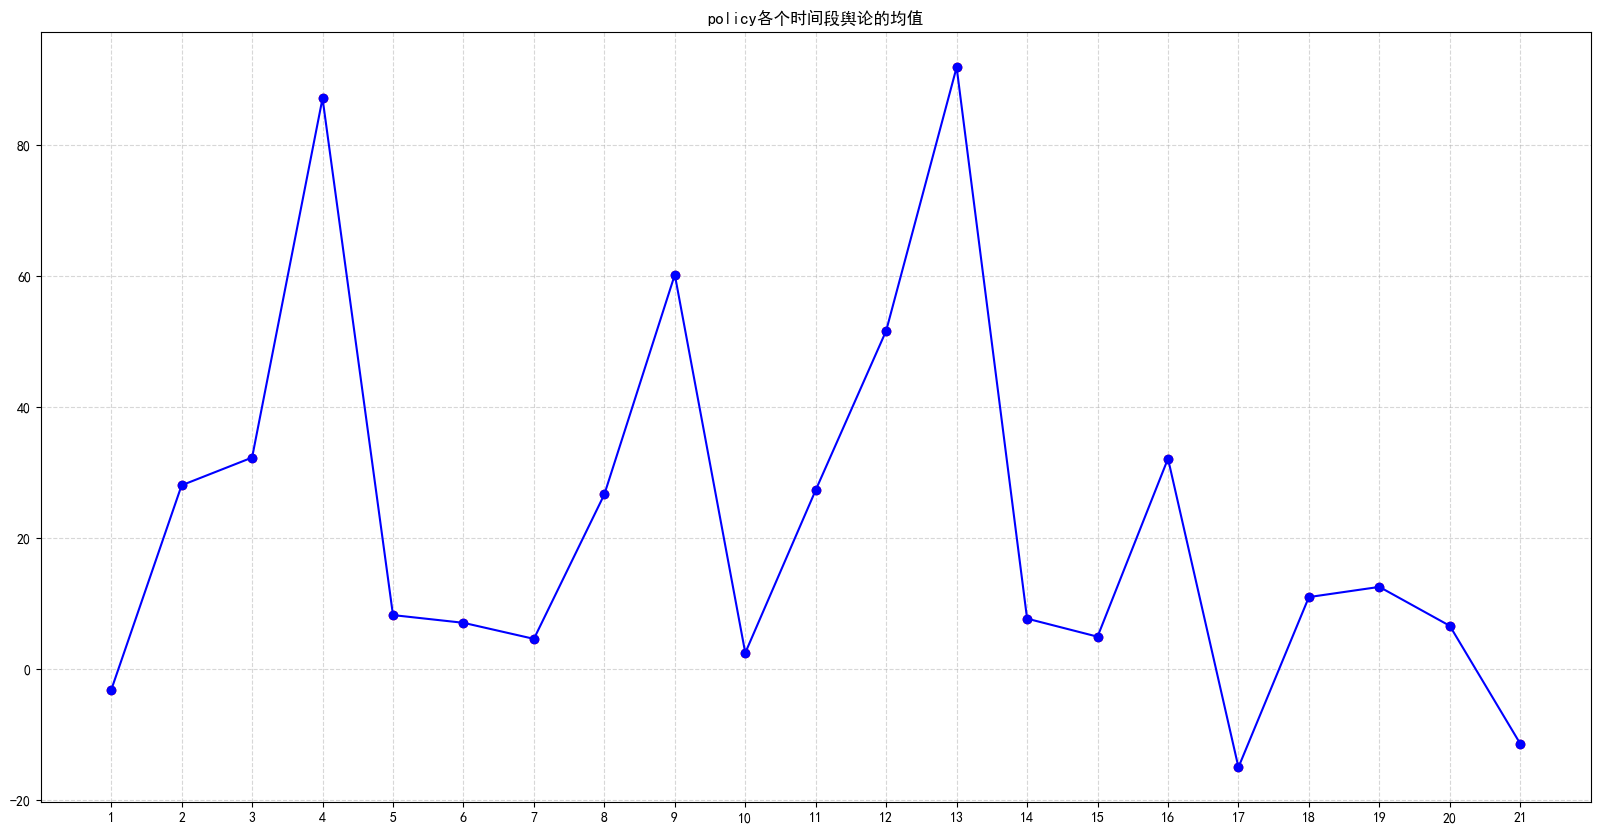

In [52]:
# 就计算每个时间段的均值
X_ai_mean = []
X_policy_mean = []
for i in range(X_ai_num):
    X_ai_mean.append(weighted_sum(X_ai[i]) / len(X_ai[i]))
for i in range(X_policy_num):
    X_policy_mean.append(weighted_sum(X_policy[i]) / len(X_policy[i]))

def plot_mean(X_mean, X_len, data_name):
    """
    画出各个时间段的均值
    :param X_mean: X的均值
    :param X_len: 时间段的个数
    :return: none
    """
    x_data = ["{}".format(i) for i in range(1, X_len + 1)]
    plt.figure(figsize=(20, 10), dpi=100)
    plt.plot(x_data, X_mean, marker="o", label="均值", c="b")
    plt.scatter(x_data, X_mean, c="r")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.title("{}各个时间段舆论的均值".format(data_name))
    plt.show()

plot_mean(X_ai_mean, X_ai_num, "ai")
plot_mean(X_policy_mean, X_policy_num, "policy")

在置信度水平为0.95时，ai的置信区间为：[-1.263625783358278,0.5509752850072278]
在置信度水平为0.95时，ai的置信区间为：[-2.7088346650886415,0.9554361219159838]
在置信度水平为0.95时，ai的置信区间为：[-0.4639312282826273,0.12780094877779005]
在置信度水平为0.95时，ai的置信区间为：[-2.144749756883132,0.876256759976961]
在置信度水平为0.95时，ai的置信区间为：[-5.384071717719364,5.369363896670685]
在置信度水平为0.95时，ai的置信区间为：[-0.23395460845831842,0.08325601125184143]
在置信度水平为0.95时，ai的置信区间为：[-2.1334888398493232,0.9962348615313752]
在置信度水平为0.95时，ai的置信区间为：[-10.078837071461141,3.150887672107824]
在置信度水平为0.95时，ai的置信区间为：[-0.4527815072837403,0.07682697386247674]
在置信度水平为0.95时，ai的置信区间为：[-1.2864941647349226,0.4187327228627915]
在置信度水平为0.95时，ai的置信区间为：[-0.7786948636030873,0.5108993834321179]
在置信度水平为0.95时，ai的置信区间为：[-0.09548712235603073,0.02206115419761962]
在置信度水平为0.95时，ai的置信区间为：[-2.1912974003369574,1.186526948542121]
在置信度水平为0.95时，ai的置信区间为：[-0.8642286281870173,0.35431978613777426]
在置信度水平为0.95时，ai的置信区间为：[-0.8321804002552698,0.2340246319139457]
在置信度水平为0.95时，ai的置信区间为：[-2.0420177182747237,0.5799471689

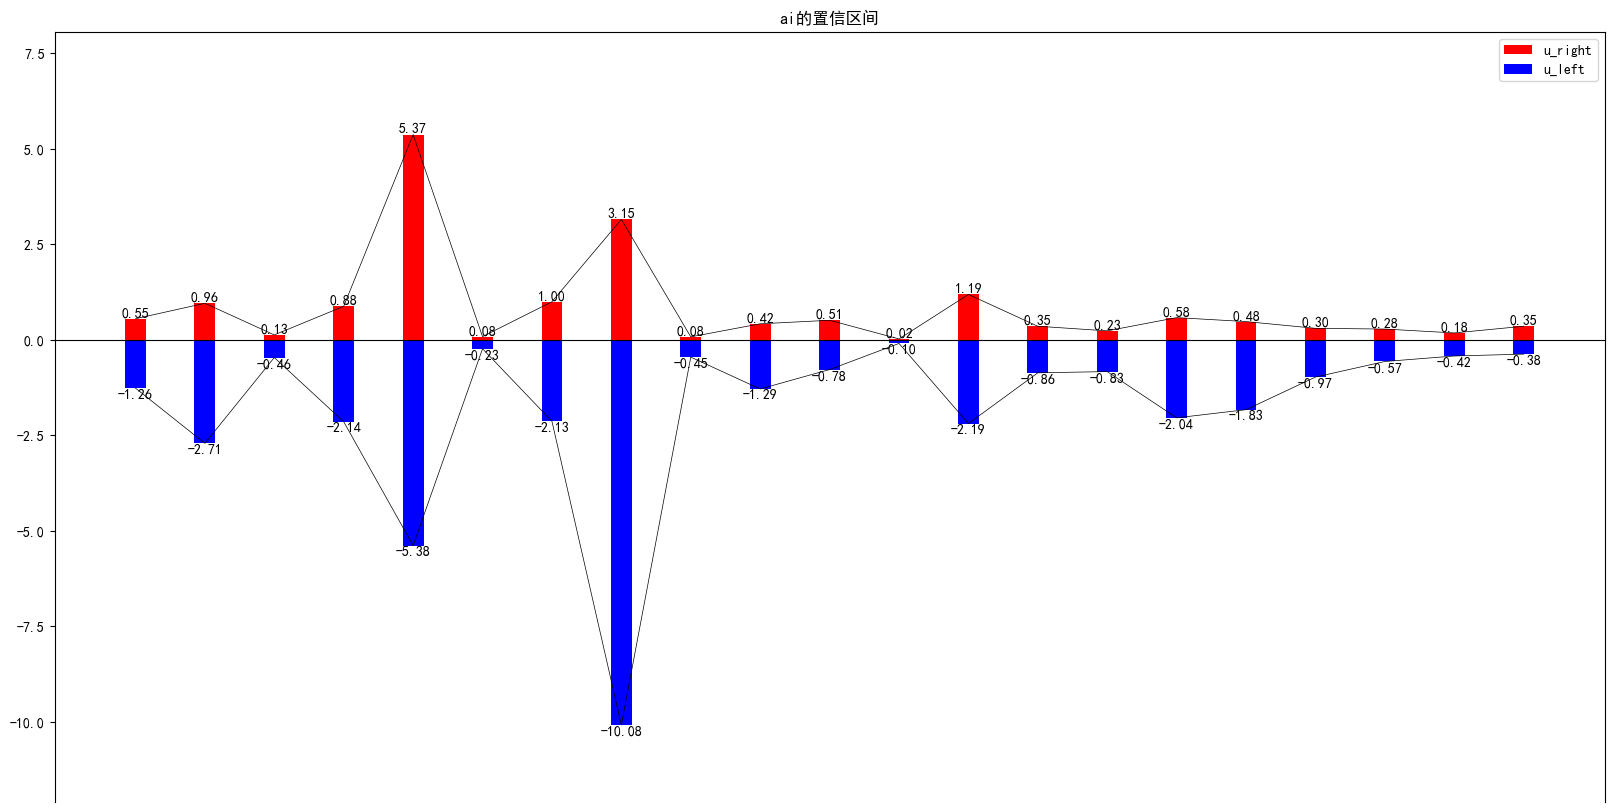

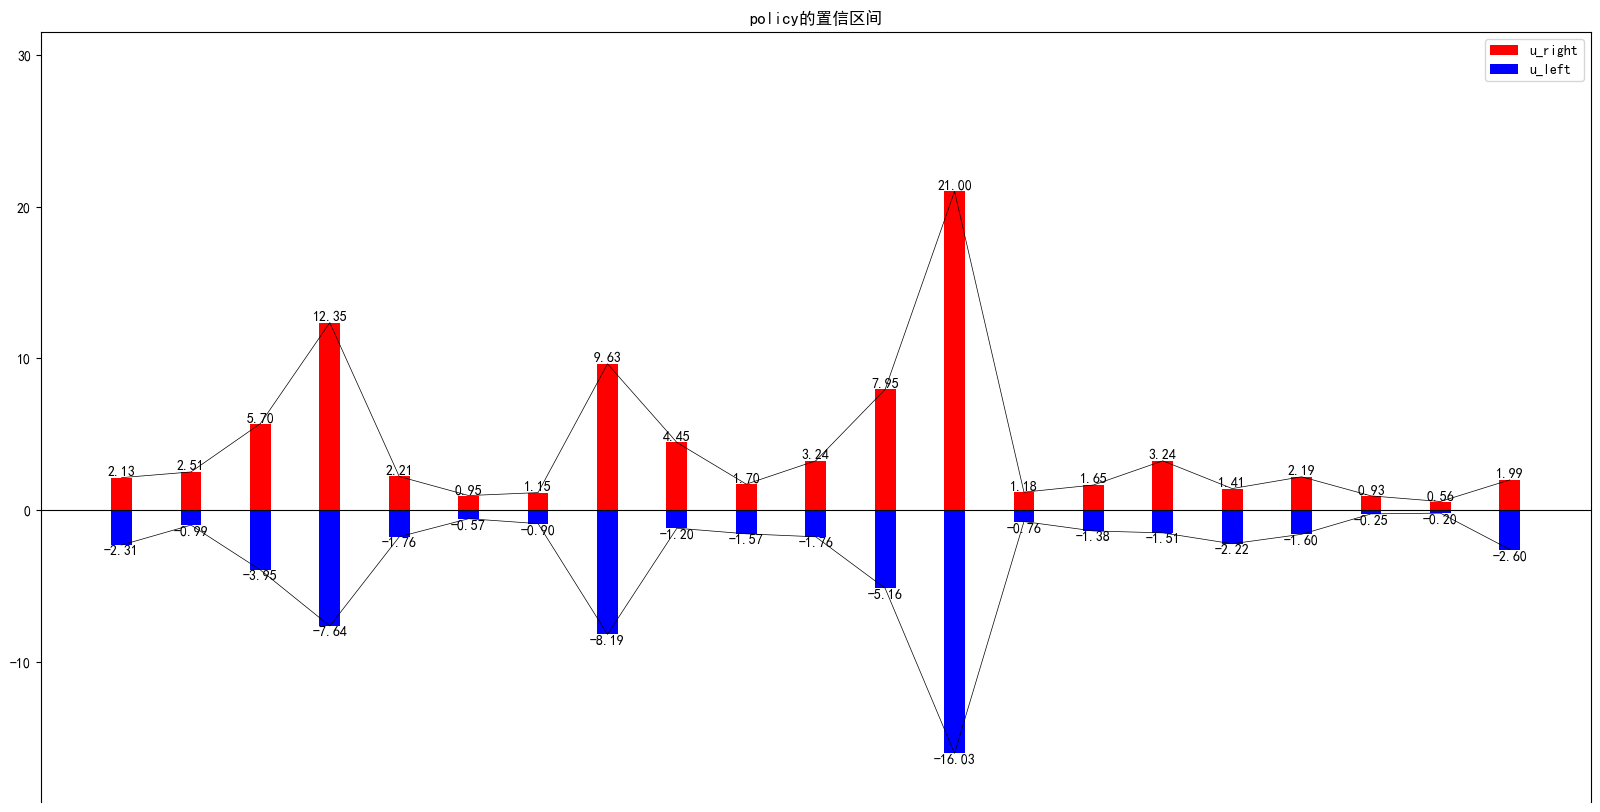

In [63]:
# 计算每个时间段的置信区间
X_ai_left = []
X_ai_right = []
X_policy_left = []
X_policy_right = []
for i in range(X_ai_num):
    # print("ai的第{}个时间段的置信区间为：".format(i))
    t1, t2 = cal_confidence_interval(X_ai[i], "ai", m)
    X_ai_left.append(t1)
    X_ai_right.append(t2)
for i in range(X_policy_num):
    # print("policy的第{}个时间段的置信区间为：".format(i))
    t1, t2 = cal_confidence_interval(X_policy[i], "policy", m)
    X_policy_left.append(t1)
    X_policy_right.append(t2)
plot_confidence_interval(X_ai_left, X_ai_right, "ai", X_ai_num)
plot_confidence_interval(X_policy_left, X_policy_right, "policy", X_policy_num)

In [35]:
# 假设检验：原假设H_0表示ai的均值大于0.5，备择假设H_1表示ai的均值小于0.5
# 换算到Z上，即为miu_0 * m
# 计算假设检验
def hypothesis_test(Z_bar, Z_std, data_name, miu_0=0.5, m=150, alpha=0.05):
    u = (Z_bar - miu_0 * m) / (Z_std / sqrt(m))
    print("u的值为：{}".format(u))
    if u > - t.cdf(alpha, m - 1):
        print("在置信度水平为{}时，{}的均值大于0.5".format(1 - alpha, data_name))
    else:
        print("在置信度水平为{}时，{}的均值小于0.5".format(1 - alpha, data_name))
m = 150
Z_ai, Z_bar_ai = data_preprocess(ai_pred_labels)
hypothesis_test(Z_bar_ai, std(m, Z_ai, Z_bar_ai), data_name="ai")
Z_policy, Z_bar_policy = data_preprocess(policy_pred_labels)
hypothesis_test(Z_bar_policy, std(m, Z_policy, Z_bar_policy), data_name="policy")


u的值为：-4.485730612269589
在置信度水平为0.95时，ai的均值小于0.5
u的值为：3.2503218551593354
在置信度水平为0.95时，policy的均值大于0.5


In [36]:
# 计算平均值
ai_X_bar = sum(ai_pred_labels)
policy_X_bar = sum(policy_pred_labels)

print("长度为{}的ai的平均值为：{}".format(len(ai_pred_labels), ai_X_bar))
print("长度为{}的policy的平均值为：{}".format(len(policy_pred_labels), policy_X_bar))

长度为10008的ai的平均值为：[ -5390 307367]
长度为10034的policy的平均值为：[  1014 989618]


ai的最大点赞数为：13292
ai的最大点赞数的评论为第1959个评论：这个机器人也不是都是同意的[不问天_大哭]我在上面说我明天会死(说着玩的)机器人说我有更好的明天，希望我能找到快乐[不问天_害羞]简直是太感人了[不问天_干杯]


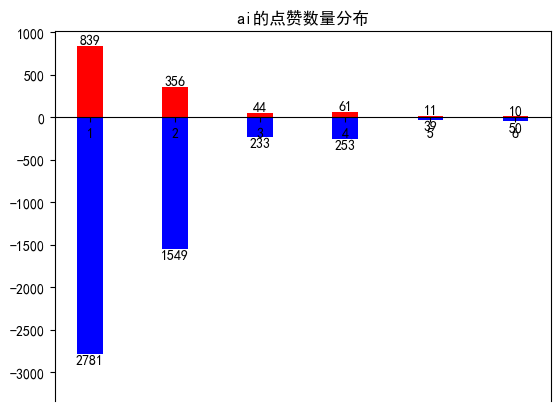

policy的最大点赞数为：37552
policy的最大点赞数的评论为第5876个评论：普通人的想法是，能不生病就别生病，健健康康平平安。一定要保护好自己。任何病。


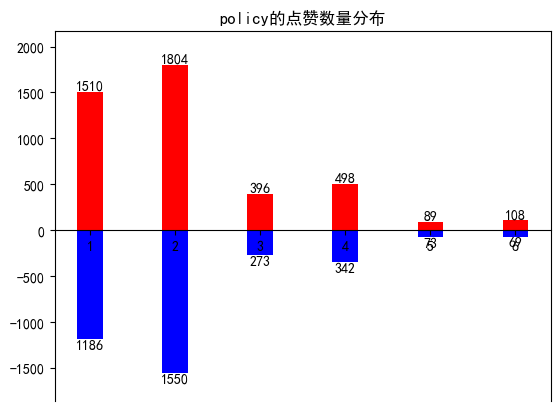

In [37]:
# 统计点赞数量分布。每10个点赞为一档
def cal_like_interval(x, likes_distribution, interval_num=6):
    if x[1] == 0:
        # 跳过点赞数量为0的数据
        return
    if x[1] < 5:
        likes_distribution[0] += 1
    elif x[1] < 50:
        likes_distribution[1] += 1
    elif x[1] < 100:
        likes_distribution[2] += 1
    elif x[1] < 500:
        likes_distribution[3] += 1
    elif x[1] < 1000:
        likes_distribution[4] += 1
    else:
        likes_distribution[5] += 1


def plot_likes_distribution(positive_likes_distribution, negative_likes_distribution, data_name, interval_num=6):
    # 绘制点赞数量分布图
    y_max = 1.2 * max(positive_likes_distribution)
    y_min = -1.2 * max(negative_likes_distribution)
    ax = plt.gca()
    ax.spines["bottom"].set_position(('data', 0))
    x_data = [i for i in range(1, interval_num + 1)]
    plt.bar(x_data, np.array(positive_likes_distribution).astype("int32"), lw=0.5, fc="r", width=0.3, label="u_right")
    plt.bar(x_data, -np.array(negative_likes_distribution).astype("int32"), lw=0.5, fc="b", width=0.3, label="u_left")
    # 标出数值
    for i, j in zip(x_data, positive_likes_distribution):
        plt.text(i, j, "%d"%j, ha="center", va="bottom")
    for i2, j2 in zip(x_data, negative_likes_distribution):
        plt.text(i2, -j2, "%d"%j2, ha="center", va="top")
    plt.ylim(y_min, y_max)
    plt.title("{}的点赞数量分布".format(data_name))
    plt.show()

def cal_distribution(data, data_name):
    # 计算点赞数量的分布
    max_likes = 0
    max_idx = 0
    for i, x in enumerate(data):
        # print(x)
        if x[1] > max_likes:
            max_likes = x[1]
            max_idx = i
    if data_name == "ai":
        print("ai的最大点赞数为：{}".format(max_likes))
        print("ai的最大点赞数的评论为第{}个评论：{}".format(max_idx, ai_prediction_data["review"][max_idx]))
    else:
        print("policy的最大点赞数为：{}".format(max_likes))
        print("policy的最大点赞数的评论为第{}个评论：{}".format(max_idx, policy_prediction_data["review"][max_idx]))

    # 划分interval_num档
    interval_num = 6
    positive_likes_distribution = [0] * interval_num
    negative_likes_distribution = [0] * interval_num
    for x in data:
        if x[0] > 0:
            cal_like_interval(x, positive_likes_distribution, interval_num)
        else:
            cal_like_interval(x, negative_likes_distribution, interval_num)
    # 绘制点赞数量的分布图
    plot_likes_distribution(positive_likes_distribution, negative_likes_distribution, data_name)
# print("ai的数据为：{}".format(ai_pred_labels))
cal_distribution(ai_pred_labels , "ai")
# print("ai的点赞数量分布为：{}".format(ai_pred_labels))
cal_distribution(policy_pred_labels, "policy")
